## My first Neural Network - Perceptron

Here I present my first neural network, a single-layer 2 classes perceptron classifier with simple two-dimensional custom data just to evaluate the algorithm.

The general layout for a single-layer neural network can be represented as follows:

<img src="pics/ldf.png" width="300">

In our case, we have three inputs (two dimensions and the bias) and one output. The connections between the neurons are called the weights and for a 2 classes classifier can be represented as the coefficients of a linear function that divides the classes:

<img src="pics/2classes.png" width="500">

The algorithm in pseudo-code implemented to train the Perceptron is:

<img src="pics/algo.png" width="500">

Now, let's see the Python code.

In [13]:
import numpy as np
from perceptron import Perceptron
import matplotlib.pyplot as plt 

A simple set of two-dimensional labeled training data is used in this example. We have two classes, +1 and -1.

In [14]:
 # train data
data = {}
data["dim1"] = [0.9, 2, 2, 1.1, 1]
data["dim2"] = [0.1, 0.8, 0.9, 0.2, 0.1]
data["class"] = [-1, 1, 1, -1, -1]               # can be divided with a line -> algorithm converge
#data["class"] = [1, 1, 1, -1, -1]                 # cannot be divided with a line -> algorithm does not converge

Now, we define out Perceptron and train it with the above defined data.

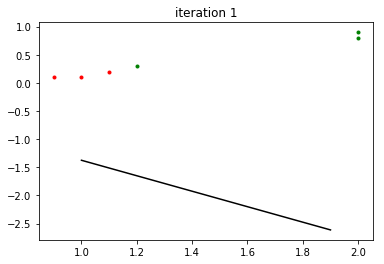

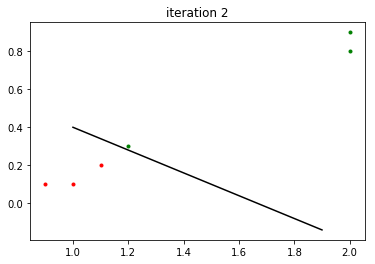

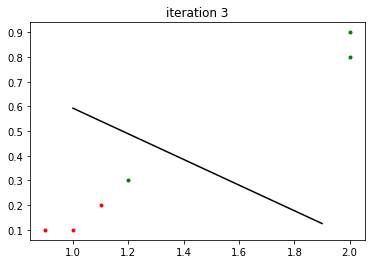

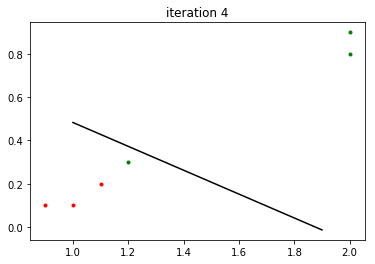

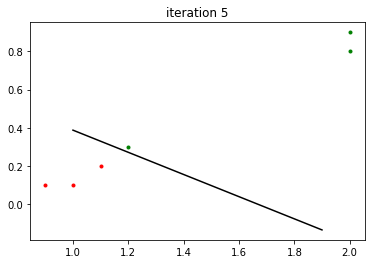

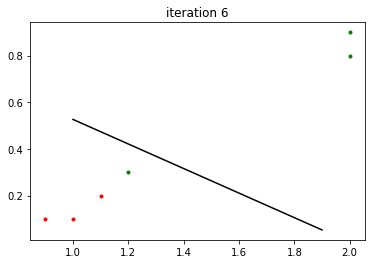

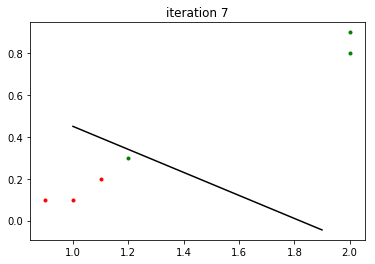

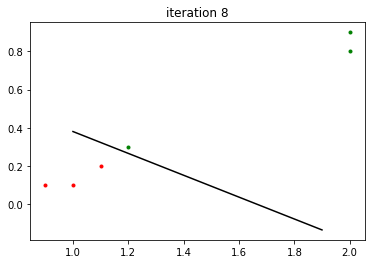

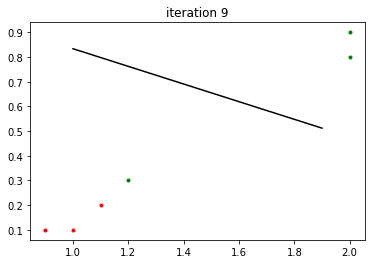

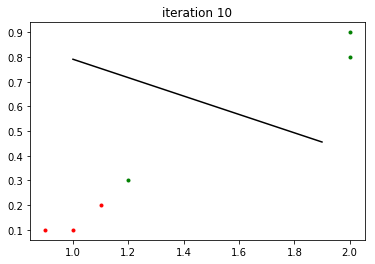

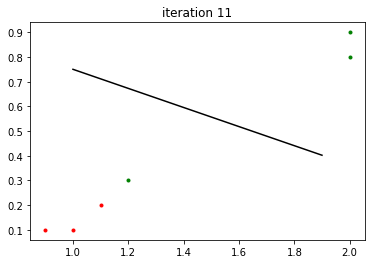

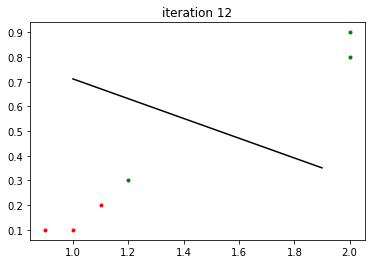

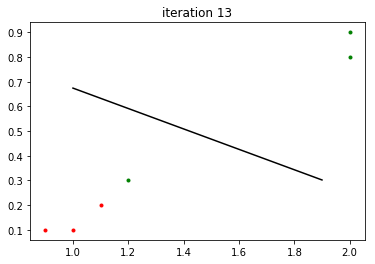

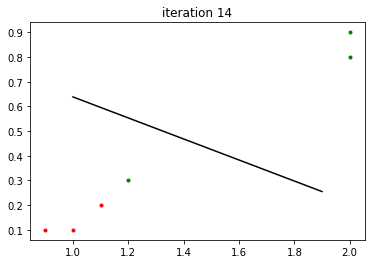

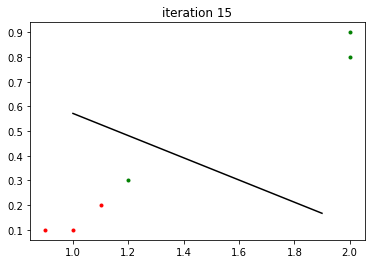

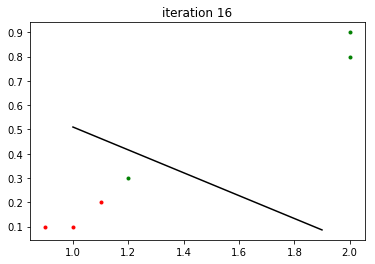

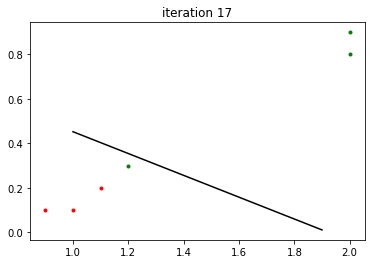

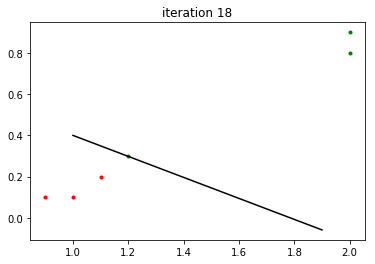

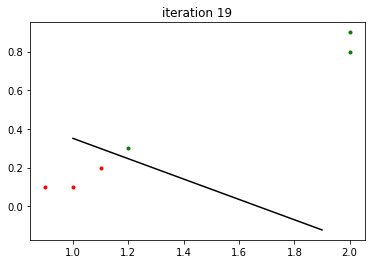

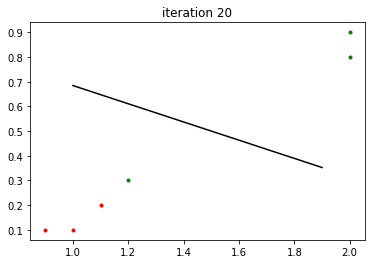

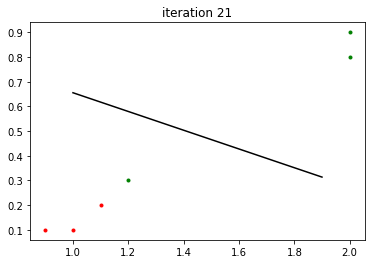

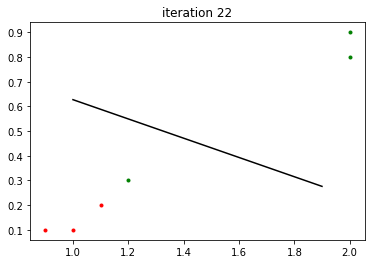

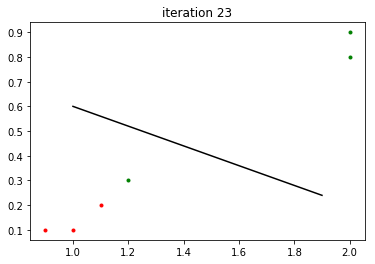

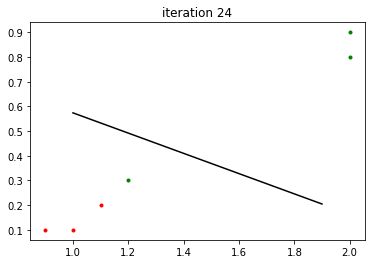

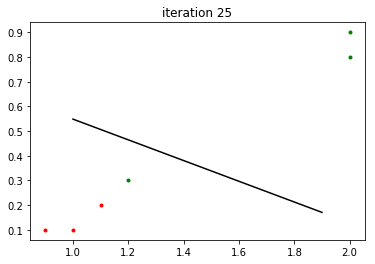

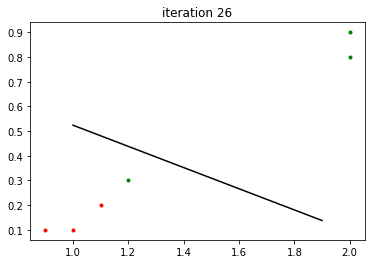

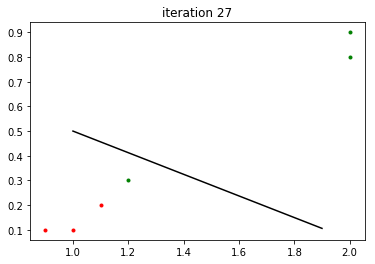

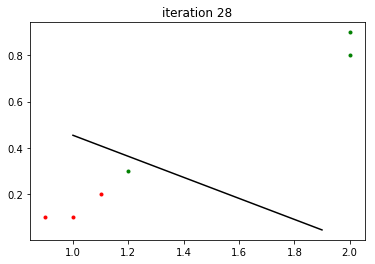

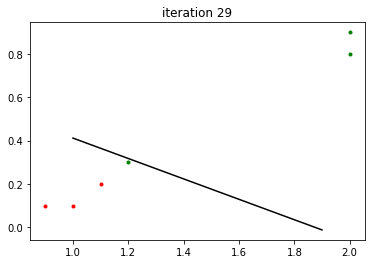

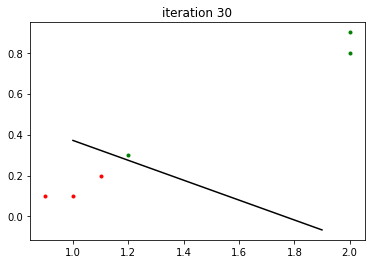

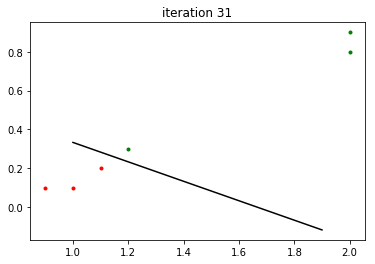

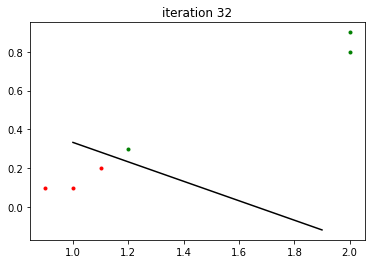

w =  [ 3.6  7.2]
w0 =  -6.0
it =  32


In [15]:
# train perceptron

# declare perceptron 
#nn = Perceptron()                             # default parameters
#nn = Perceptron(ploter=True)                  # set ploter to True to visualize the algorithm as it runs
nn = Perceptron(a=1,b=0.4,ploter=True)       # change the parameters of the algorithm (a, b)
# set classes
nn.setC(data["class"])
# define data points
M = len(data["class"])
x = np.zeros((M,2))
for i in range(M):
    x[i][0] = data["dim1"][i]
    x[i][1] = data["dim2"][i]
#train
nn.train(x)

Now we can test a point to evaluate the accuracy of the classifier.

testData is of class  1


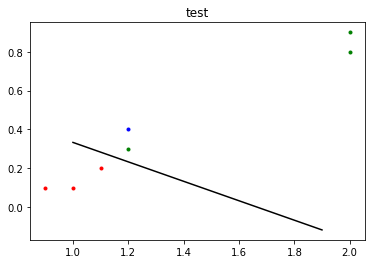

In [16]:
# test perceptron
testData = np.asarray([1.2,0.4])
clas = nn.evaluate(testData)
print("testData is of class ",clas)
plt.plot(testData[0],testData[1],'.b')

# plot results
nn.plot(x,'test')

This is the Perceptron class:

In [17]:
class Perceptron:
    # init preceptron
    def __init__(self,a = 0.1,b = 0.1,itMax = 100, ploter=False):
        # parameters
        self.a = a
        self.b = b
        self.itMax = itMax
        self.ploter = ploter
        # init weights
        self.w = np.zeros(2)    
        self.w0 = 0.
        # 2 classes (+1, -1)
        self.c = np.zeros(2)
    # setters
    def setC(self,c):
        self.c = c
    # train perceptron
    def train(self,x):
        it = 0
        # random acces to data
        arr = list(range(len(x)))
        random.shuffle(arr)        
        while True:
            error = 0.
            it += 1
            for i in arr:
                g = self.c[i]*(np.dot(self.w,x[i]) + self.w0)
                if g < self.b:
                    self.w += self.a*self.c[i]*x[i]
                    self.w0 += self.a*self.c[i]
                    error += 1
            if self.ploter:
                self.plot(x,tit="iteration "+str(it))
            if error == 0 or it >= self.itMax:
                break;
        print("w = ",self.w)
        print("w0 = ",self.w0)
        print("it = ",it)
        if it == self.itMax:            
            print("Not converged")
    # evaluate
    def evaluate(self,test):
        g = (np.dot(self.w,test) + self.w0)
        if g > 0:
            return 1
        else:
            return -1    
    # plot 
    def plot(self,x,tit=''):
        plt.plot(
            [j for i, j in enumerate(x[:,0]) if self.c[i] == 1],
            [j for i, j in enumerate(x[:,1]) if self.c[i] == 1],
            '.g'
        )
        plt.plot(
            [j for i, j in enumerate(x[:,0]) if self.c[i] == -1],
            [j for i, j in enumerate(x[:,1]) if self.c[i] == -1],
            '.r'
        )
        xp = np.arange(1,2,step=0.1)
        yp = -(xp*self.w[0] + self.w0)/self.w[1]
        plt.plot(xp,yp,'k')
        plt.title(tit)
        plt.show()

## Propsed tasks

- Try with a train data set that cannot be divided with a line, for example set point [0.9,0.1] to class 1. The algorithm will not converge without training errors (this is why we need a maxium number of iterations stop criteria), but the perceptron will be able to classify nevertheless.
- The optimal parameters of the perceptron (a, b) will depend on the data and must be adjusted (it will affect convergence).


## Author

Juan Sensio - juansensio03@gmail.com